In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from metpy.units import units

In [2]:
def top_SM(exp, model):
    #Parameters
    nSoil = 6 #Number of soil layers the sum is taken over
    soil1 = xr.DataArray([0.005, 0.025, 0.07, 0.16, 0.34, 0.70, 1.47, 2.86, 5.74, 11.50], dims="soil1", coords={"soil1": range(10)}) #Thickness of layers 

    const= xr.open_mfdataset('/users/davidle/postproc_data/'+model+'_PRUDENCE_MASKS_LAND.nc')
    mask = xr.where(const.MASK_ANALYSIS,const.FR_LAND,0).values.astype(bool)

    ds = xr.open_mfdataset('/scratch/snx3000/davidle/results_soil-moisture-pertubation/results/'+exp+'/project/pr04/davidle/results_soil-moisture_pertubation/'+exp+'/????/'+model+'/24h/lffd??????????.nc')
    w_so = ds.W_SO.where(mask).mean(dim=['rlon', 'rlat']).isel(soil1=slice(None, nSoil)).sum(dim='soil1')
    w_so = w_so /  soil1.isel(soil1=slice(None, nSoil)).sum(dim='soil1')
   
    #To handle leap years
    month_day_str = xr.DataArray(ds.indexes['time'].strftime('%m-%d'), dims=("time"), coords={time: ds.coords['time']}, name='month_day_str')   

    return ds.sel(time="1999").indexes['time'].strftime('%m-%d'), w_so.groupby(month_day_str)

In [3]:
ctrl_time, ctrl = top_SM('ctrl', 'lm_c')
wet_time, wet = top_SM('wet25', 'lm_c')
dry_time, dry = top_SM('dry25', 'lm_c')

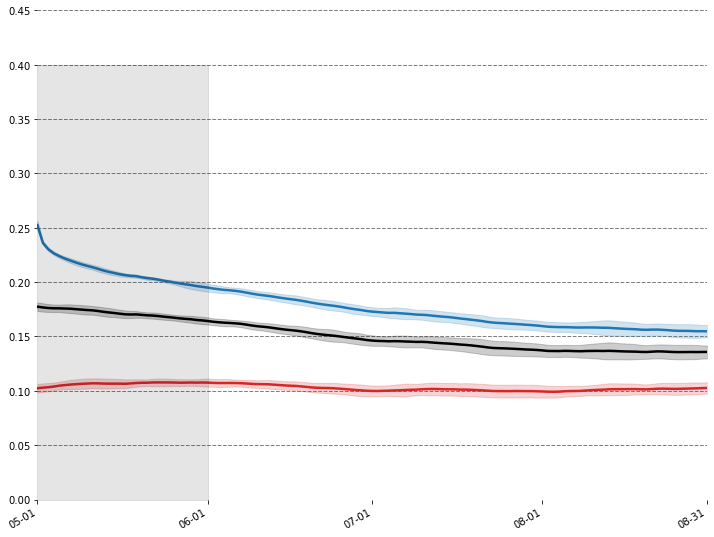

In [8]:
plt.figure(figsize=(12, 9))

ax = plt.subplot(111)

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.xlim(0,122)

plt.ylim(0,0.45)
plt.xticks([0,31,61,92,122])

plt.grid(True, color='C7', linestyle='--', linewidth=1, axis='y',zorder=0)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.fill_betweenx(np.arange(0., 0.50, 0.1) , 0, 31, alpha=0.1, color='black', zorder=6)

plt.plot(dry_time, dry.mean(), lw=2.5, color='C3',label='WET',linestyle='-',zorder=2)
plt.fill_between(dry_time, dry.mean() + dry.std(), dry.mean() - dry.std(), alpha=0.2, color='C3', zorder=5)

plt.plot(wet_time, wet.mean(), lw=2.5, color='C0',label='WET',linestyle='-',zorder=2)
plt.fill_between(ctrl_time, wet.mean() + wet.std(), wet.mean() - wet.std(), alpha=0.2, color='C0', zorder=5)

plt.plot(ctrl_time, ctrl.mean(), lw=2.5, color='black',label='CTRL',linestyle='-',zorder=3)
plt.fill_between(ctrl_time, ctrl.mean() + ctrl.std(), ctrl.mean() - ctrl.std(), alpha=0.2, color='black', zorder=6)

plt.savefig('lm_c_timeseries_SM_ANALYSIS.pdf', bbox_inches='tight')

In [9]:
lm_f_ctrl_time, lm_f_ctrl = top_SM('ctrl', 'lm_f')
lm_f_wet_time, lm_f_wet = top_SM('wet25', 'lm_f')
lm_f_dry_time, lm_f_dry = top_SM('dry25', 'lm_f')

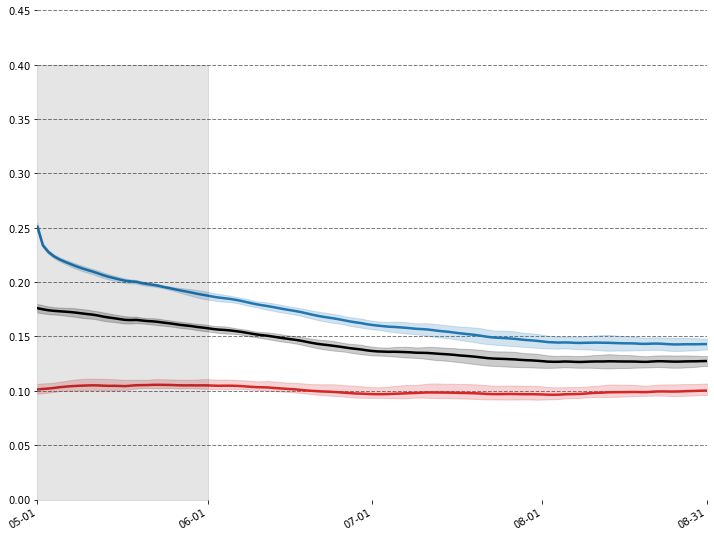

In [10]:
plt.figure(figsize=(12, 9))

ax = plt.subplot(111)

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.xlim(0,122)

plt.ylim(0,0.45)
plt.xticks([0,31,61,92,122])

plt.grid(True, color='C7', linestyle='--', linewidth=1, axis='y',zorder=0)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.fill_betweenx(np.arange(0., 0.50, 0.1) , 0, 31, alpha=0.1, color='black', zorder=6)

plt.plot(lm_f_dry_time, lm_f_dry.mean(), lw=2.5, color='C3',label='WET',linestyle='-',zorder=2)
plt.fill_between(lm_f_dry_time, dry.mean() + lm_f_dry.std(), lm_f_dry.mean() - lm_f_dry.std(), alpha=0.2, color='C3', zorder=5)

plt.plot(lm_f_wet_time, lm_f_wet.mean(), lw=2.5, color='C0',label='WET',linestyle='-',zorder=2)
plt.fill_between(lm_f_ctrl_time, lm_f_wet.mean() + lm_f_wet.std(), lm_f_wet.mean() - lm_f_wet.std(), alpha=0.2, color='C0', zorder=5)

plt.plot(lm_f_ctrl_time, lm_f_ctrl.mean(), lw=2.5, color='black',label='CTRL',linestyle='-',zorder=3)
plt.fill_between(lm_f_ctrl_time, lm_f_ctrl.mean() + lm_f_ctrl.std(), lm_f_ctrl.mean() - lm_f_ctrl.std(), alpha=0.2, color='black', zorder=6)

plt.savefig('lm_f_timeseries_SM_ANALYSIS.pdf', bbox_inches='tight')